In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_aa76292aacef4a8cbd147911d1cfb31e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='O8YkodxDtuFso3qUoB48B_pp4YZ5sC0lFM3x1ZQ-Gs93',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_aa76292aacef4a8cbd147911d1cfb31e.get_object(Bucket='capstoneproject-donotdelete-pr-wes2tgx5nkdabi',Key='nyc-rolling-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [7]:
df = df.rename(columns= {'ZIP CODE' : 'ZIPCODE'})
df = df.rename(columns = {'LAND SQUARE FEET' : 'SIZE'})
df =df.rename(columns ={'BUILDING CLASS CATEGORY' : 'BUILDING_CATEGORY'})
df = df.rename(columns ={'RESIDENTIAL UNITS' : 'RESIDENTIAL_UNITS'})
df = df.rename(columns ={'BUILDING CLASS AT TIME OF SALE':'BUILDING_CLASS'})
df =df.rename(columns ={'SALE PRICE' : 'PRICE'})


In [8]:
df = df[['ZIPCODE','BOROUGH','NEIGHBORHOOD','BUILDING_CATEGORY','RESIDENTIAL_UNITS','BUILDING_CLASS','SIZE','PRICE']]


In [9]:
df.head()


,ZIPCODE,BOROUGH,NEIGHBORHOOD,BUILDING_CATEGORY,RESIDENTIAL_UNITS,BUILDING_CLASS,SIZE,PRICE
0,10009,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,5,C2,1633,6625000
1,10009,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,28,C7,4616,-
2,10009,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,16,C7,2212,-
3,10009,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10,C4,2272,3936272
4,10009,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6,C2,2369,8000000


In [10]:
df.dtypes

ZIPCODE               int64
BOROUGH               int64
NEIGHBORHOOD         object
BUILDING_CATEGORY    object
RESIDENTIAL_UNITS     int64
BUILDING_CLASS       object
SIZE                 object
PRICE                object
dtype: object

In [11]:
df['PRICE'] = df['PRICE'].str.replace('-','NaN')
df['SIZE'] = df['SIZE'].str.replace('-','NaN')

In [18]:
df.dropna(subset =['SIZE'],inplace = True)

In [20]:
df.dropna(subset =['PRICE'],inplace = True)

In [21]:
df.shape

(48799, 8)

In [22]:
df.PRICE = df.PRICE.astype(float)
df.SIZE =df.SIZE.astype(float)
df.RESIDENTIAL_UNITS = df.RESIDENTIAL_UNITS.astype(float)

In [23]:
df['BOROUGH'] = df['BOROUGH'].replace(1,'Manhattan').astype(object)
df['BOROUGH'] = df['BOROUGH'].replace(2,'Bronx').astype(object)
df['BOROUGH'] = df['BOROUGH'].replace(3,'Brooklyn').astype(object)
df['BOROUGH'] = df['BOROUGH'].replace(4,'Queens').astype(object)
df['BOROUGH'] = df['BOROUGH'].replace(5,'Staten Island').astype(object)

In [24]:
df =df.reset_index()

In [25]:
df.drop(['index'],axis =1,inplace =True)

In [26]:
df.head(20)

,ZIPCODE,BOROUGH,NEIGHBORHOOD,BUILDING_CATEGORY,RESIDENTIAL_UNITS,BUILDING_CLASS,SIZE,PRICE
0,10009,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,5.0,C2,1633.0,6625000.0
1,10009,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10.0,C4,2272.0,3936272.0
2,10009,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6.0,C2,2369.0,8000000.0
3,10009,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8.0,C4,1750.0,3192840.0
4,10009,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,24.0,D9,4489.0,16232000.0
5,10009,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,10.0,D1,3717.0,10350000.0
6,10009,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,24.0,C6,4131.0,11900000.0
7,10002,Manhattan,ALPHABET CITY,11A CONDO-RENTALS,132.0,RR,33650.0,52625000.0
8,10009,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,3.0,S3,1520.0,3300000.0
9,10009,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,4.0,S4,2201.0,7215000.0


Text(0.5, 1.0, 'countplot for BOROUGH')

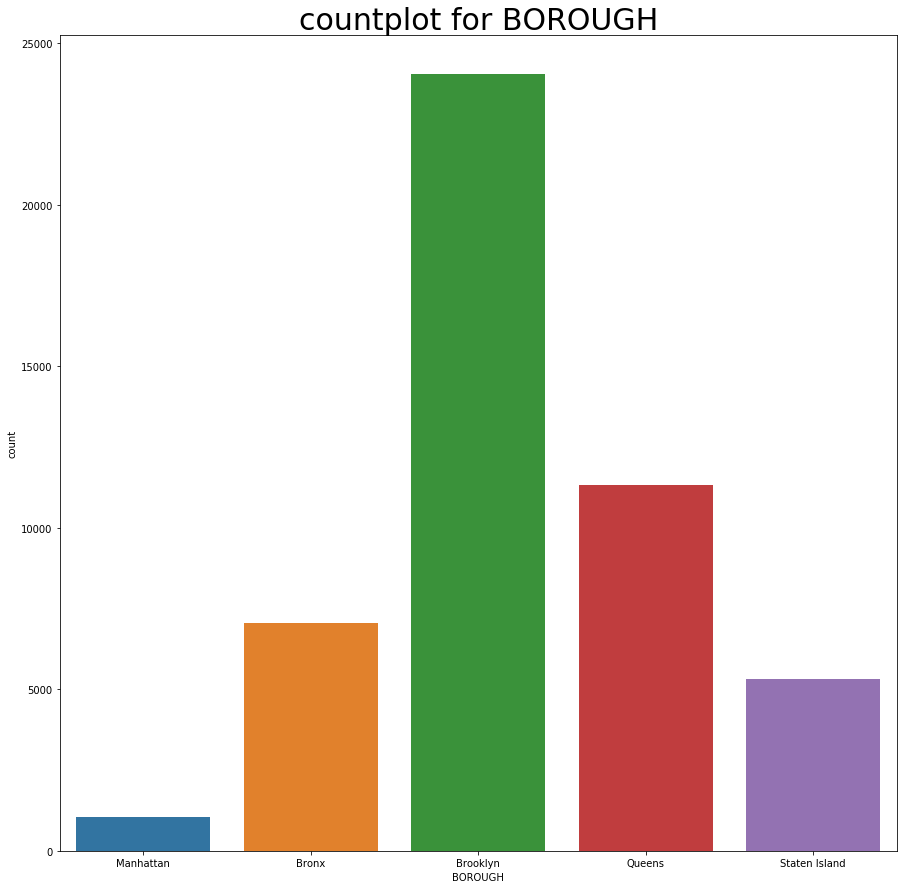

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(15,15))
sns.countplot(df['BOROUGH'])
plt.title("countplot for BOROUGH",fontsize =30)


In [32]:
print("The count of each BOROUGH is \n", df['BOROUGH'].value_counts())

The count of each BOROUGH is 
 Brooklyn         24047
Queens           11319
Bronx             7049
Staten Island     5334
Manhattan         1050
Name: BOROUGH, dtype: int64


In [173]:
Brooklyn_sales = df[df['BOROUGH'] =='Brooklyn'].reset_index(drop =True)


In [174]:
Brooklyn_sales['PRICE'] =Brooklyn_sales['PRICE'].astype(object)

In [175]:
zipcode_grouped =Brooklyn_sales.groupby('ZIPCODE')
zipcode_grouped.head()

,ZIPCODE,BOROUGH,NEIGHBORHOOD,BUILDING_CATEGORY,RESIDENTIAL_UNITS,BUILDING_CLASS,SIZE,PRICE
0,11228,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,A5,1547.0,800000
1,11228,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,A5,1933.0,0
2,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,A5,1638.0,0
3,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,S1,1342.0,1.2e+06
4,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,S1,1740.0,1.09e+06
5,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,A9,2868.0,0
6,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,S1,1172.0,1.06e+06
11,11228,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,A1,1933.0,788000
12,11228,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,A9,1933.0,750000
23,11228,Brooklyn,BATH BEACH,02 TWO FAMILY DWELLINGS,2.0,B1,2320.0,1.388e+06


In [176]:
Brooklyn_sales['PRICE'] = Brooklyn_sales['PRICE'].replace(0,'NaN')

In [177]:
Brooklyn_sales.dropna(subset =['PRICE'],inplace = True)

In [178]:
Brooklyn_sales['ZIPCODE'].unique()

array([11228, 11214,     0, 11220, 11209, 11219, 11221, 11233, 11213,
       11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217, 11201,
       11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236, 11239,
       11231, 11249, 11224, 11225, 11208, 11210, 11203, 11229, 11215,
       11223, 11222, 11211])

[Text(0, 0, '0'),
 Text(0, 0, '11201'),
 Text(0, 0, '11203'),
 Text(0, 0, '11204'),
 Text(0, 0, '11205'),
 Text(0, 0, '11206'),
 Text(0, 0, '11207'),
 Text(0, 0, '11208'),
 Text(0, 0, '11209'),
 Text(0, 0, '11210'),
 Text(0, 0, '11211'),
 Text(0, 0, '11212'),
 Text(0, 0, '11213'),
 Text(0, 0, '11214'),
 Text(0, 0, '11215'),
 Text(0, 0, '11216'),
 Text(0, 0, '11217'),
 Text(0, 0, '11218'),
 Text(0, 0, '11219'),
 Text(0, 0, '11220'),
 Text(0, 0, '11221'),
 Text(0, 0, '11222'),
 Text(0, 0, '11223'),
 Text(0, 0, '11224'),
 Text(0, 0, '11225'),
 Text(0, 0, '11226'),
 Text(0, 0, '11228'),
 Text(0, 0, '11229'),
 Text(0, 0, '11230'),
 Text(0, 0, '11231'),
 Text(0, 0, '11232'),
 Text(0, 0, '11233'),
 Text(0, 0, '11234'),
 Text(0, 0, '11235'),
 Text(0, 0, '11236'),
 Text(0, 0, '11237'),
 Text(0, 0, '11238'),
 Text(0, 0, '11239'),
 Text(0, 0, '11249')]

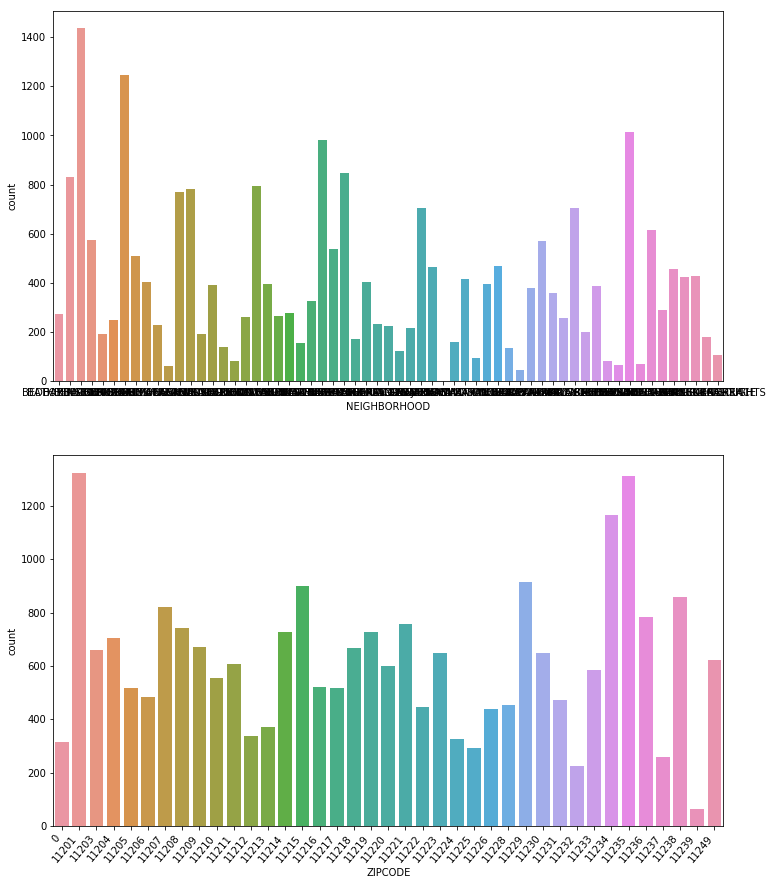

In [179]:
fig, ax =plt.subplots(2,1, figsize=(12,15))
sns.countplot(Brooklyn_sales['NEIGHBORHOOD'], ax=ax[0])
sns.countplot(Brooklyn_sales['ZIPCODE'], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50, ha="right")


In [180]:
x =Brooklyn_sales['ZIPCODE'].value_counts()
x

11201    1324
11235    1312
11234    1165
11229     916
11215     899
11238     858
11207     823
11236     782
11221     759
11208     744
11219     729
11214     727
11204     706
11209     671
11218     668
11203     661
11230     649
11223     648
11249     622
11211     607
11220     599
11233     585
11210     554
11216     522
11217     517
11205     516
11206     482
11231     471
11228     453
11222     448
11226     440
11213     373
11212     336
11224     328
0         315
11225     292
11237     259
11232     224
11239      63
Name: ZIPCODE, dtype: int64

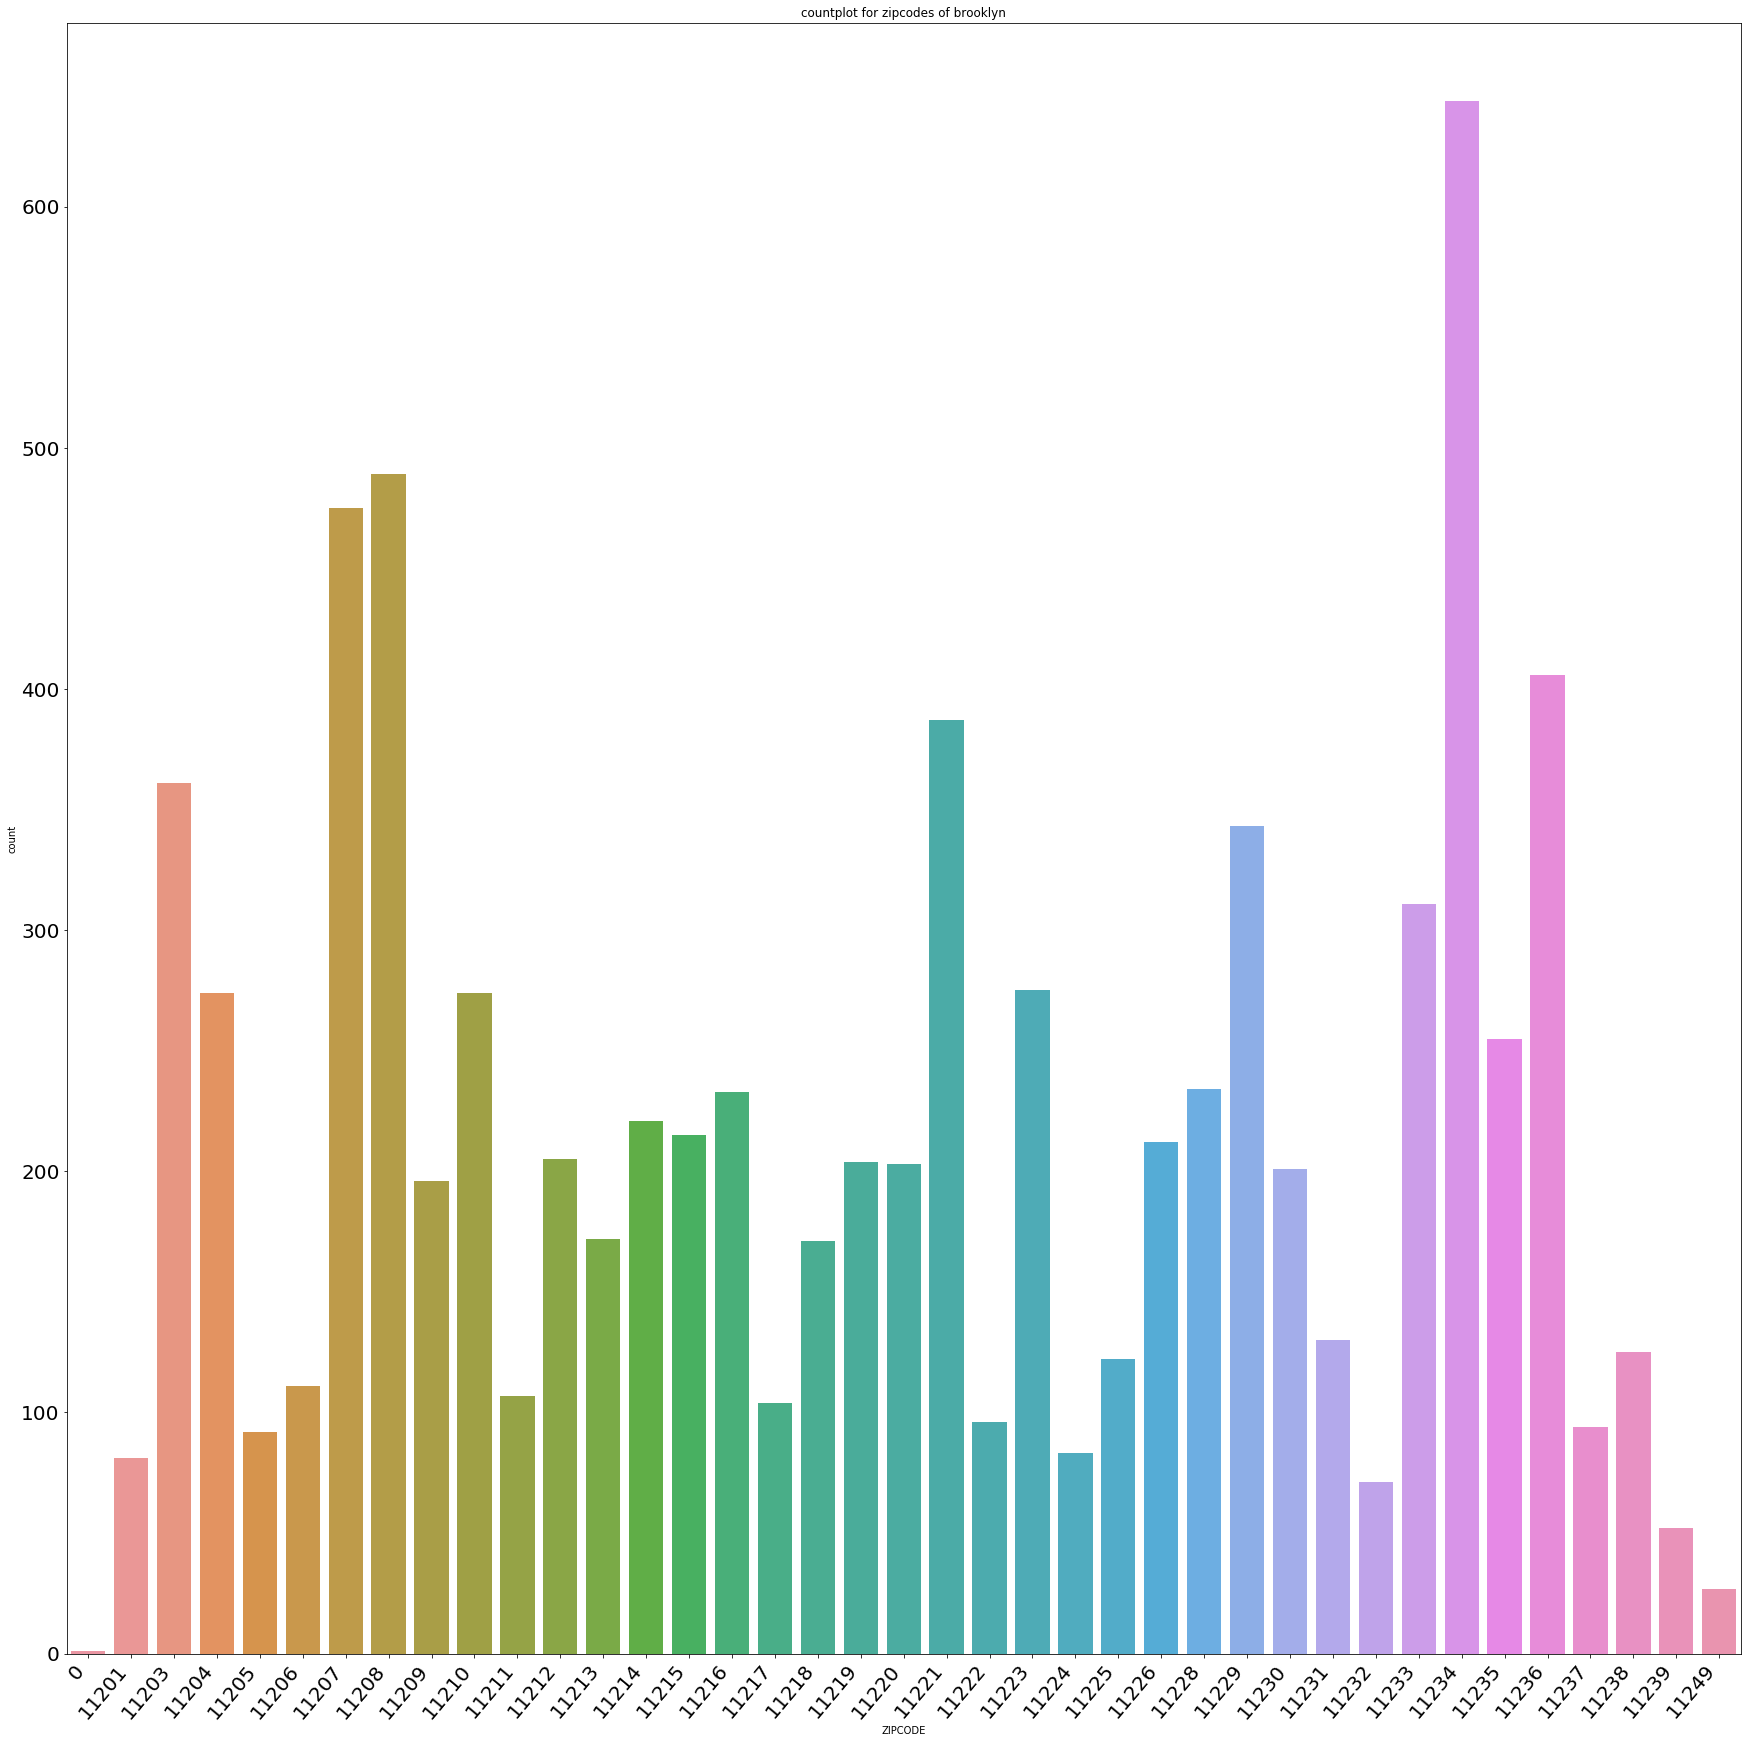

In [228]:
plt.figure(figsize =(30,30))
ax = sns.countplot('ZIPCODE',data =Brooklyn_sales)
plt.title("countplot for zipcodes of brooklyn")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize =(30,30))
ax = sns.countplot('',data =Brooklyn_sales)
plt.title("countplot for zipcodes of brooklyn")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=20)

In [201]:
print("The maximum number of sales  happened in a zipcode is",x.max(), "and the zipcode is 11201")


The maximum number of sales  happened in a zipcode is 1324 and the zipcode is 11201


In [182]:
Brooklyn_sales= Brooklyn_sales[Brooklyn_sales['PRICE']!='NaN']
Brooklyn_sales= Brooklyn_sales[Brooklyn_sales['RESIDENTIAL_UNITS']!=0]
Brooklyn_sales.shape

(12044, 8)

Text(0.5, 1.0, 'scatter plot between residential units and price')

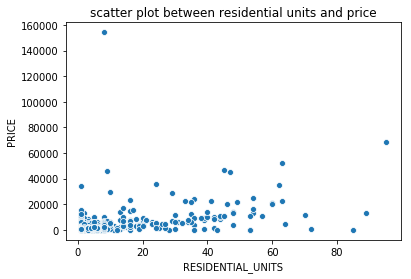

In [191]:
sns.scatterplot(x='RESIDENTIAL_UNITS',y='PRICE',data =Brooklyn_sales)
plt.title("scatter plot between residential units and price")

In [186]:
Brooklyn_sales['PRICE'] =(Brooklyn_sales['PRICE']/1000).astype(float)

In [187]:
Brooklyn_sales.describe()

,ZIPCODE,RESIDENTIAL_UNITS,SIZE,PRICE
count,12044.000000,12044.000000,12044.000000,12044.000000
mean,11219.659332,2.301893,1705.013036,1191.659871
std,103.030470,6.794295,2449.644789,2491.887580
min,0.000000,1.000000,0.000000,0.001000
25%,11209.000000,1.000000,0.000000,540.000000
50%,11220.000000,1.000000,1875.500000,843.564500
75%,11233.000000,2.000000,2350.000000,1315.000000
max,11249.000000,324.000000,152000.000000,154250.000000


In [219]:
Brooklyn_sales= Brooklyn_sales[Brooklyn_sales['RESIDENTIAL_UNITS']<=100]
Brooklyn_sales= Brooklyn_sales[Brooklyn_sales['PRICE']<=50000]


Text(0.5, 1.0, 'scatterplot between residential units and price without outliers')

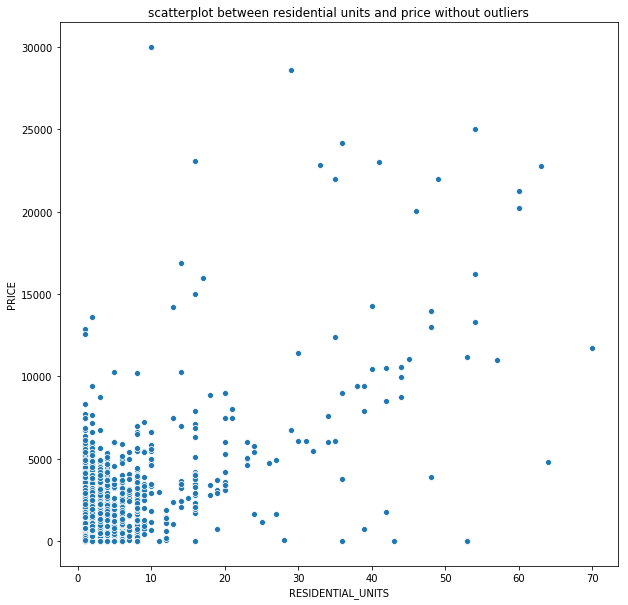

In [220]:
plt.figure(figsize =(10,10))
sns.scatterplot(x='RESIDENTIAL_UNITS',y='PRICE',data =Brooklyn_sales)
plt.title("scatterplot between residential units and price without outliers")

In [109]:
print("The maximum number of sales  happened in a zipcode is",x.max(), "and the zipcode is 11201")


The maximum number of sales  happened in a zipcode is 1324 and the zipcode is 11201


In [203]:
Brooklyn_sales.reset_index(drop=True).head()

,ZIPCODE,BOROUGH,NEIGHBORHOOD,BUILDING_CATEGORY,RESIDENTIAL_UNITS,BUILDING_CLASS,SIZE,PRICE
0,11228,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,A5,1547.0,800.0
1,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,S1,1342.0,1200.0
2,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,S1,1740.0,1090.0
3,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,S1,1172.0,1060.0
4,11214,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1.0,A1,5750.0,2050.0


In [213]:
Brooklyn_sales= Brooklyn_sales[Brooklyn_sales['SIZE']!=0]

Text(0.5, 1.0, 'scatterplot between size and price')

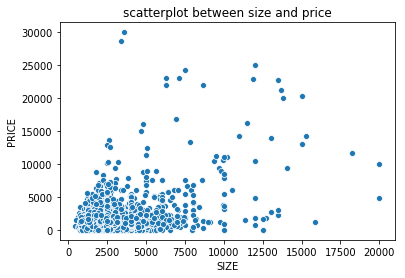

In [214]:
sns.scatterplot(x='SIZE',y ="PRICE",data =Brooklyn_sales)
plt.title("scatterplot between size and price")

In [211]:
Brooklyn_sales= Brooklyn_sales[Brooklyn_sales['SIZE']<=20000]
Brooklyn_sales= Brooklyn_sales[Brooklyn_sales['PRICE']<=30000]

Text(0.5, 1.0, 'scatterplot between size and price')

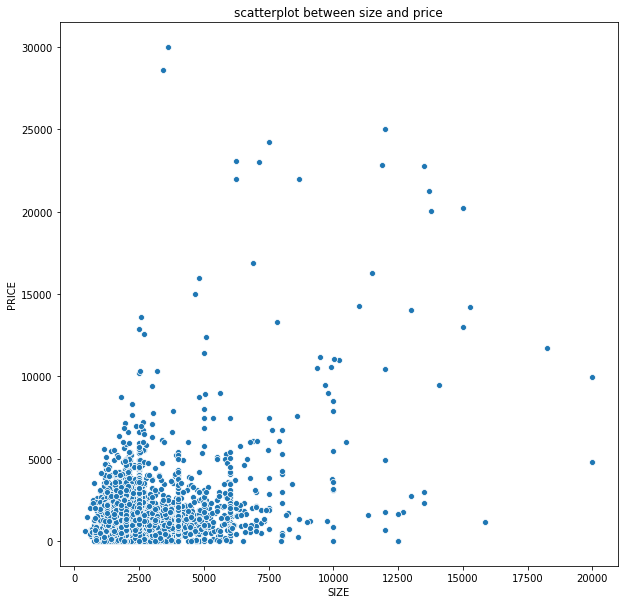

In [212]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='SIZE',y ="PRICE",data =Brooklyn_sales)
plt.title("scatterplot between size and price")

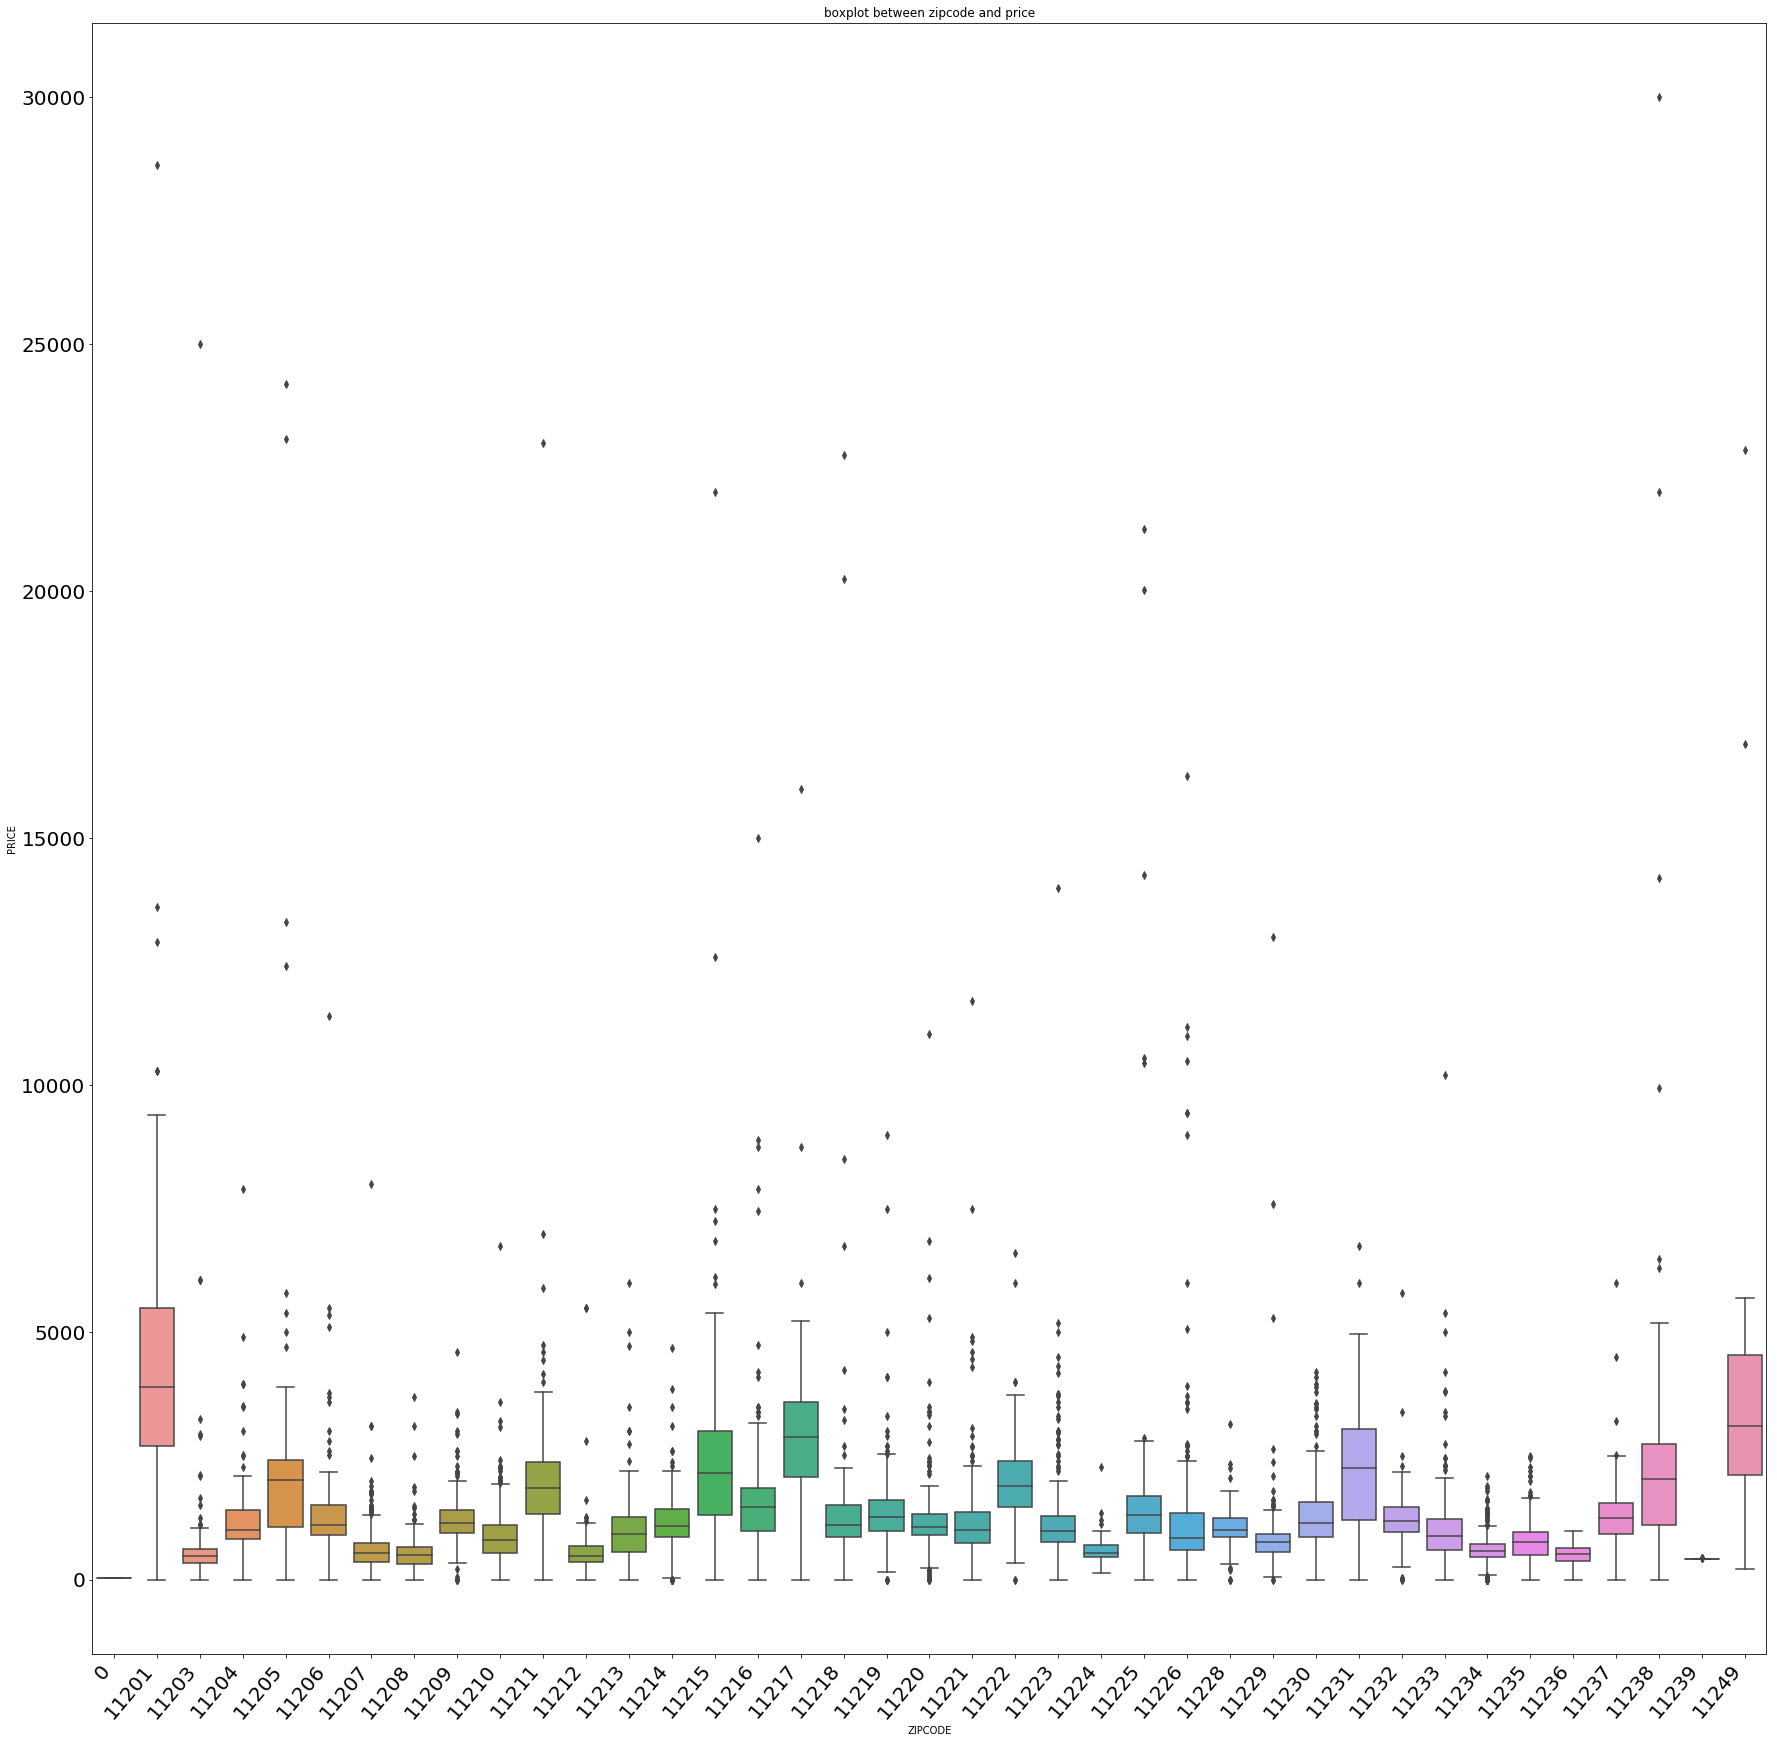

In [227]:
plt.figure(figsize =(30,30))
ax = sns.boxplot(x ='ZIPCODE',y ='PRICE',data =Brooklyn_sales)
plt.title("boxplot between zipcode and price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.tick_params(labelsize=20)


In [231]:
Brooklyn_sales1=Brooklyn_sales[Brooklyn_sales['ZIPCODE']==11201]
Brooklyn_sales1

,ZIPCODE,BOROUGH,NEIGHBORHOOD,BUILDING_CATEGORY,RESIDENTIAL_UNITS,BUILDING_CLASS,SIZE,PRICE
3321,11201,Brooklyn,BOERUM HILL,01 ONE FAMILY DWELLINGS,1.0,A4,1425.0,4000.00
3326,11201,Brooklyn,BOERUM HILL,01 ONE FAMILY DWELLINGS,1.0,A5,2007.0,5000.00
3327,11201,Brooklyn,BOERUM HILL,01 ONE FAMILY DWELLINGS,1.0,A9,2500.0,4950.00
3328,11201,Brooklyn,BOERUM HILL,01 ONE FAMILY DWELLINGS,1.0,A7,2500.0,5375.00
3342,11201,Brooklyn,BOERUM HILL,02 TWO FAMILY DWELLINGS,2.0,S2,2112.0,4100.00
3347,11201,Brooklyn,BOERUM HILL,02 TWO FAMILY DWELLINGS,2.0,B3,1667.0,2300.00
3356,11201,Brooklyn,BOERUM HILL,02 TWO FAMILY DWELLINGS,2.0,S2,1200.0,3825.00
3357,11201,Brooklyn,BOERUM HILL,02 TWO FAMILY DWELLINGS,2.0,S2,2578.0,13600.00
3358,11201,Brooklyn,BOERUM HILL,02 TWO FAMILY DWELLINGS,2.0,S2,2500.0,3750.00
3359,11201,Brooklyn,BOERUM HILL,02 TWO FAMILY DWELLINGS,2.0,B9,2000.0,5850.00


In [232]:
Brooklyn_sales1['NEIGHBORHOOD'].unique()

array(['BOERUM HILL', 'BROOKLYN HEIGHTS', 'COBBLE HILL',
       'COBBLE HILL-WEST', 'DOWNTOWN-FULTON FERRY',
       'DOWNTOWN-FULTON MALL', 'DOWNTOWN-METROTECH'], dtype=object)

In [88]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [89]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [90]:
neighborhoods_data = newyork_data['features']

In [110]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [111]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
neighborhoods = pd.DataFrame(columns=column_names)

In [112]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [113]:
neighborhoods = neighborhoods.sort_values(by=['Borough']).reset_index(drop=True)
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Country Club,40.844246,-73.824099
2,Bronx,Parkchester,40.837938,-73.856003
3,Bronx,Westchester Square,40.840619,-73.842194
4,Bronx,Van Nest,40.843608,-73.866299
5,Bronx,Morris Park,40.847549,-73.850402
6,Bronx,Belmont,40.857277,-73.888452
7,Bronx,Spuyten Duyvil,40.881395,-73.917190
8,Bronx,North Riverdale,40.908543,-73.904531
9,Bronx,Pelham Bay,40.850641,-73.832074


In [114]:
print(neighborhoods['Borough'].unique())

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


In [115]:
neighborhoods.shape

(306, 4)

In [116]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent = 'my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [4]:
 !pip -q install folium import folium 

  ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import


In [117]:
import folium
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

ModuleNotFoundError: No module named 'folium'

In [119]:
Brooklyn_data = neighborhoods[neighborhoods['Borough']=='Brooklyn'].reset_index(drop =True)
Brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Downtown,40.690844,-73.983463
1,Brooklyn,Erasmus,40.646926,-73.948177
2,Brooklyn,Fort Hamilton,40.614768,-74.031979
3,Brooklyn,Ocean Parkway,40.613060,-73.968367
4,Brooklyn,South Side,40.710861,-73.958001


In [118]:
Brooklyn_data['Neighborhood'].unique()

array(['Downtown', 'Erasmus', 'Fort Hamilton', 'Ocean Parkway',
       'South Side', 'Prospect Lefferts Gardens', 'Boerum Hill',
       'Georgetown', 'Prospect Park South', 'Bergen Beach', 'City Line',
       'Ocean Hill', 'North Side', 'East Williamsburg', 'Homecrest',
       'Highland Park', 'Dumbo', 'Broadway Junction', 'Weeksville',
       'Vinegar Hill', 'Fulton Ferry', 'Ditmas Park', 'Mill Basin',
       'Paerdegat Basin', 'New Lots', 'Remsen Village', 'Rugby',
       'Wingate', 'Sea Gate', 'Madison', 'Clinton Hill', 'Midwood',
       'Gerritsen Beach', 'Marine Park', 'Brooklyn Heights',
       'Bedford Stuyvesant', 'Bushwick', 'Williamsburg', 'Brownsville',
       'Prospect Heights', 'Windsor Terrace', 'Kensington',
       'Carroll Gardens', 'East Flatbush', 'Flatbush',
       'Manhattan Terrace', 'Sheepshead Bay', 'Brighton Beach',
       'Gravesend', 'Greenpoint', 'Sunset Park', 'Bensonhurst',
       'Bay Ridge', 'Crown Heights', 'Red Hook', 'Cobble Hill',
       'East New Yor

In [120]:
Brooklyn_data.loc[7,'Neighborhood']

'Georgetown'

In [121]:
neighborhood_name = Brooklyn_data.loc[7,'Neighborhood']
neighborhood_latitude = Brooklyn_data.loc[7,'Latitude']
neighborhood_longitude = Brooklyn_data.loc[7,'Longitude']
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Georgetown are 40.62384524478419, -73.91607483951324.


In [122]:
CLIENT_ID = 'QOMH2GSGQGOSKOMZTANLGAPTI0ZARDRYOWYBWSGZZCDKEUEA' # your Foursquare ID
CLIENT_SECRET = 'QRCCRYPFFV1FFGEA2W0I20MQX1KNUS3OOJYHXMQHYAIWJKQP' # your Foursquare Secret
VERSION = '20200610' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QOMH2GSGQGOSKOMZTANLGAPTI0ZARDRYOWYBWSGZZCDKEUEA
CLIENT_SECRET:QRCCRYPFFV1FFGEA2W0I20MQX1KNUS3OOJYHXMQHYAIWJKQP


In [123]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=QOMH2GSGQGOSKOMZTANLGAPTI0ZARDRYOWYBWSGZZCDKEUEA&client_secret=QRCCRYPFFV1FFGEA2W0I20MQX1KNUS3OOJYHXMQHYAIWJKQP&v=20200610&ll=40.62384524478419,-73.91607483951324&radius=500&limit=100'

In [124]:
results = requests.get(url).json()

In [125]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [126]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Duane Reade,Pharmacy,40.622544,-73.917005
1,Fairway Market Georgetown,Supermarket,40.626150,-73.915848
2,Dunkin',Donut Shop,40.621356,-73.916896
3,Original Pizza,Pizza Place,40.620783,-73.917287
4,Five Guys,Burger Joint,40.626501,-73.916224


In [127]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Found {} venues in {} neighborhoods.'.format(nearby_venues.shape[0], len(venues_list)))
    
    return(nearby_venues)

In [128]:
Brooklyn_venues = getNearbyVenues(names=Brooklyn_data['Neighborhood'],
                                   latitudes=Brooklyn_data['Latitude'],
                                   longitudes=Brooklyn_data['Longitude'])

Found 2731 venues in 70 neighborhoods.


In [129]:
Brooklyn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,40.690844,-73.983463,Alamo Drafthouse Cinema,40.691016,-73.983686,Movie Theater
1,Downtown,40.690844,-73.983463,DeKalb Market Hall,40.691250,-73.982579,Food Court
2,Downtown,40.690844,-73.983463,Trader Joe's,40.691340,-73.982515,Grocery Store
3,Downtown,40.690844,-73.983463,Daigo Hand Roll Bar,40.691259,-73.982603,Japanese Restaurant
4,Downtown,40.690844,-73.983463,Han Dynasty,40.691334,-73.982456,Chinese Restaurant


In [130]:
print(Brooklyn_venues.shape)
Brooklyn_venues.tail()

(2731, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2726,Coney Island,40.574293,-73.988683,Footprints Cafe,40.575592,-73.983271,Caribbean Restaurant
2727,Coney Island,40.574293,-73.988683,MCU Park Party Deck,40.574945,-73.984332,Baseball Stadium
2728,Coney Island,40.574293,-73.988683,Kitchen 21,40.572648,-73.987524,Food Court
2729,Coney Island,40.574293,-73.988683,Trini Smoke Shack,40.575021,-73.986972,Smoke Shop
2730,Coney Island,40.574293,-73.988683,Mermaid Pharmacy,40.577906,-73.986515,Pharmacy


In [131]:
Brooklyn_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,50,50,50,50,50,50
Bay Ridge,82,82,82,82,82,82
Bedford Stuyvesant,30,30,30,30,30,30
Bensonhurst,30,30,30,30,30,30
Bergen Beach,7,7,7,7,7,7
Boerum Hill,91,91,91,91,91,91
Borough Park,20,20,20,20,20,20
Brighton Beach,44,44,44,44,44,44
Broadway Junction,15,15,15,15,15,15


In [133]:
print('There are {} distinct venues in {} categories.'.format(
    len(Brooklyn_venues['Venue'].unique()),len(Brooklyn_venues['Venue Category'].unique())))

There are 2222 distinct venues in 282 categories.


In [134]:
Brooklyn_onehot = pd.get_dummies(Brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Brooklyn_onehot['Neighborhood'] = Brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
#fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])
#scarborough_onehot = scarborough_onehot[fixed_columns]

neighbor = Brooklyn_onehot['Neighborhood']
Brooklyn_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
Brooklyn_onehot.insert(0, 'Neighborhood', neighbor)

Brooklyn_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Pop-Up Shop,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietname

In [135]:
Brooklyn_grouped = Brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
Brooklyn_grouped

,Neighborhood,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Pop-Up Shop,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietname

In [136]:
num_top_venues = 5

for hood in Brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Brooklyn_grouped[Brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0    Chinese Restaurant  0.08
1           Pizza Place  0.06
2              Pharmacy  0.06
3  Fast Food Restaurant  0.04
4           Gas Station  0.04


----Bay Ridge----
                venue  freq
0                 Spa  0.07
1  Italian Restaurant  0.06
2    Greek Restaurant  0.05
3         Pizza Place  0.05
4          Bagel Shop  0.04


----Bedford Stuyvesant----
           venue  freq
0    Coffee Shop  0.10
1           Café  0.07
2  Deli / Bodega  0.07
3            Bar  0.07
4    Pizza Place  0.07


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.10
1    Sushi Restaurant  0.07
2      Ice Cream Shop  0.07
3          Donut Shop  0.07
4              Bakery  0.07


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.29
1      Baseball Field  0.14
2  Athletics & Sports  0.14
3   Other Repair Shop  0.14
4          Playground  0.14


----Boerum Hill----
                    venue  freq
0          

              venue  freq
0  Basketball Court   0.1
1      Soccer Field   0.1
2               Gym   0.1
3    Baseball Field   0.1
4       Pizza Place   0.1


----Midwood----
              venue  freq
0       Pizza Place  0.33
1     Deli / Bodega  0.08
2  Video Game Store  0.08
3            Market  0.08
4          Pharmacy  0.08


----Mill Basin----
                 venue  freq
0   Chinese Restaurant  0.11
1  Japanese Restaurant  0.09
2          Pizza Place  0.09
3       Cosmetics Shop  0.06
4                 Bank  0.06


----Mill Island----
                           venue  freq
0                      Locksmith   0.5
1                           Pool   0.5
2           Other Great Outdoors   0.0
3  Paper / Office Supplies Store   0.0
4           Pakistani Restaurant   0.0


----New Lots----
                 venue  freq
0  Fried Chicken Joint  0.10
1        Grocery Store  0.10
2        Deli / Bodega  0.10
3          Pizza Place  0.10
4       Discount Store  0.05


----North Side----
     

In [139]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [140]:
um_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Brooklyn_grouped['Neighborhood']

for ind in np.arange(Brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pharmacy,Pizza Place,Bubble Tea Shop,Italian Restaurant
1,Bay Ridge,Spa,Italian Restaurant,Greek Restaurant,Pizza Place,Bar
2,Bedford Stuyvesant,Coffee Shop,Pizza Place,Bar,Café,Deli / Bodega
3,Bensonhurst,Chinese Restaurant,Bakery,Sushi Restaurant,Ice Cream Shop,Italian Restaurant
4,Bergen Beach,Harbor / Marina,Baseball Field,Park,Other Repair Shop,Playground
5,Boerum Hill,Dance Studio,Coffee Shop,Bar,Furniture / Home Store,Bakery
6,Borough Park,Bank,Deli / Bodega,Pizza Place,Pharmacy,Fast Food Restaurant
7,Brighton Beach,Restaurant,Beach,Russian Restaurant,Eastern European Restaurant,Mobile Phone Shop
8,Broadway Junction,Donut Shop,Fried Chicken Joint,Diner,Grocery Store,Sandwich Place
9,Brooklyn Heights,Yoga Studio,Deli / Bodega,Park,Bakery,Gym


In [141]:
neighborhoods_venues_sorted.iloc[33,]

Neighborhood                     Georgetown
1st Most Common Venue                  Bank
2nd Most Common Venue            Donut Shop
3rd Most Common Venue              Pharmacy
4th Most Common Venue           Pizza Place
5th Most Common Venue    Miscellaneous Shop
Name: 33, dtype: object

In [142]:
kclusters = 5

Brooklyn_grouped_clustering = Brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(Brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 
kmeans.labels_

array([2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 4, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 3, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 2], dtype=int32)

In [143]:
Brooklyn_merged = Brooklyn_data

# add clustering labels
Brooklyn_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Brooklyn_merged = Brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Brooklyn_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Brooklyn,Downtown,40.690844,-73.983463,2,Pizza Place,Burger Joint,Coffee Shop,Sandwich Place,Juice Bar
1,Brooklyn,Erasmus,40.646926,-73.948177,0,Caribbean Restaurant,Donut Shop,School,Sandwich Place,Chinese Restaurant
2,Brooklyn,Fort Hamilton,40.614768,-74.031979,0,Pizza Place,Deli / Bodega,Bus Stop,Sandwich Place,Chinese Restaurant
3,Brooklyn,Ocean Parkway,40.613060,-73.968367,2,Sushi Restaurant,Pizza Place,Deli / Bodega,Steakhouse,General Entertainment
4,Brooklyn,South Side,40.710861,-73.958001,2,Coffee Shop,Bar,American Restaurant,Pizza Place,Yoga Studio


In [144]:
Brooklyn_cluster_0 = Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 0, Brooklyn_merged.columns[[1] + list(range(4, Brooklyn_merged.shape[1]))]]

Brooklyn_cluster_1 = Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 1, Brooklyn_merged.columns[[1] + list(range(4, Brooklyn_merged.shape[1]))]]

Brooklyn_cluster_2 = Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 2, Brooklyn_merged.columns[[1] + list(range(4, Brooklyn_merged.shape[1]))]]

Brooklyn_cluster_3 = Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 3, Brooklyn_merged.columns[[1] + list(range(4, Brooklyn_merged.shape[1]))]]

Brooklyn_cluster_4 = Brooklyn_merged.loc[Brooklyn_merged['Cluster Labels'] == 4, Brooklyn_merged.columns[[1] + list(range(4, Brooklyn_merged.shape[1]))]]

In [145]:
Brooklyn_cluster_0

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Erasmus,0,Caribbean Restaurant,Donut Shop,School,Sandwich Place,Chinese Restaurant
2,Fort Hamilton,0,Pizza Place,Deli / Bodega,Bus Stop,Sandwich Place,Chinese Restaurant
5,Prospect Lefferts Gardens,0,Bakery,Café,Pizza Place,Caribbean Restaurant,Deli / Bodega
9,Bergen Beach,0,Harbor / Marina,Baseball Field,Park,Other Repair Shop,Playground
11,Ocean Hill,0,Grocery Store,Deli / Bodega,Bus Stop,Food,Southern / Soul Food Restaurant
13,East Williamsburg,0,Bar,Deli / Bodega,Coffee Shop,Cocktail Bar,Bakery
15,Highland Park,0,Grocery Store,Liquor Store,Garden,Big Box Store,Park
16,Dumbo,0,Park,Coffee Shop,Scenic Lookout,Art Gallery,Boxing Gym
21,Ditmas Park,0,Chinese Restaurant,Burger Joint,Deli / Bodega,Pizza Place,Donut Shop
22,Mill Basin,0,Chinese Restaurant,Pizza Place,Japanese Restaurant,Bagel Shop,Bank


In [146]:
Brooklyn_cluster_1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
45,Manhattan Terrace,1,Pizza Place,Donut Shop,Ice Cream Shop,Bagel Shop,Sushi Restaurant


In [147]:
Brooklyn_cluster_2

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Downtown,2,Pizza Place,Burger Joint,Coffee Shop,Sandwich Place,Juice Bar
3,Ocean Parkway,2,Sushi Restaurant,Pizza Place,Deli / Bodega,Steakhouse,General Entertainment
4,South Side,2,Coffee Shop,Bar,American Restaurant,Pizza Place,Yoga Studio
6,Boerum Hill,2,Dance Studio,Coffee Shop,Bar,Furniture / Home Store,Bakery
7,Georgetown,2,Bank,Donut Shop,Pharmacy,Pizza Place,Miscellaneous Shop
8,Prospect Park South,2,Caribbean Restaurant,Grocery Store,Pizza Place,Fast Food Restaurant,Mobile Phone Shop
10,City Line,2,Donut Shop,Grocery Store,Shoe Store,Pizza Place,Sandwich Place
14,Homecrest,2,Bank,Donut Shop,Sandwich Place,Chinese Restaurant,Mexican Restaurant
17,Broadway Junction,2,Donut Shop,Fried Chicken Joint,Diner,Grocery Store,Sandwich Place
18,Weeksville,2,Discount Store,Grocery Store,Cosmetics Shop,Chinese Restaurant,Lounge


In [148]:
Brooklyn_cluster_3

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
47,Brighton Beach,3,Restaurant,Beach,Russian Restaurant,Eastern European Restaurant,Mobile Phone Shop


In [149]:
Brooklyn_cluster_4

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,North Side,4,Coffee Shop,Pizza Place,Yoga Studio,Wine Bar,Jewelry Store
